# Movie Ratings Prediction using Artificial Neural Networks

### 1. Authors Information:

+ 1312716 - La Ngọc Thùy An

+ 1312693 - Hà Đức Việt

### 2. Problem statement

An attempt on building a robust feedforward neural network from movie’s features: its genre, its release dates.

### 3. Dataset

Dataset is collected from MovieLens 100K Dataset - GroupLens (http://grouplens.org/datasets/movielens/100k/).

After pre-processing, it includes 1680 movies. Each movie has 20 features of film (day, month, 18 kinds of genre) and average ratings.

### 4. Model Architecture

Our model consists of one hidden layer with 15 units. It can easily scale up to larger model with a few changes but hyperparameters must be chosen carefully.

We train our model with mini-batch stochastic gradient descent algorithm. In all experiments, we use early stopping with patience equals to 6000 epochs, up to a maximum of 10000 epochs. Our learning algorithm’s hyperparameters are as follows: mini-batch size of 150, momentum of 0.9, and learning rate of 0.001

### 5. Error Metric

+ Mean Squared Error: $MSE = \dfrac{1}{n} \sum_i^n{(h_W(x^i) - y^i)^2} $ Where $h_W(x)$ is predicted rating of our model.
+ $R^2 = 1 - \dfrac{MSE}{MST} $, Where MSE is defined above, and MST is equals to MSE of our model on training set.

## 6. Experiment and Result

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from run_ml100k import *

Number of input feature:  20
Size of train data: 1008, Size of validation data: 336, Size of test data: 336


## 6.1 Activation function:

Cài đặt danh sách tham số và hàm chạy tổng quát để tiện thử nghiệm. Hàm exp_activation_fucntion(act_func) sẽ lần lượt thử từng bộ tham số (learning rate, momentum) lấy từ trong danh sách với hàm kích hoạt act_func tương ứng.

In [3]:
parm.n_epoch = 3000
parm.max_patience = 2000
parm.mnb_size = 150
    
parm.lamda = 0.0
parm.run_dropout = False
parm.run_batchnorm = False

learning_rate_list = [0.001, 0.005, 0.01]
momentum_list = [0, 0.9]

In [4]:
def exp_activation_function(act_func):
    for learning_rate in learning_rate_list:
        for momentum in momentum_list:
            parm.act_func = act_func
            parm.learning_rate = learning_rate
            parm.momentum = momentum
            _, _, _ = run_training(True)

### 6.1.1 Find the best parameters of SIGMOID

Activation function: SIGMOID
Training with learning rate = 0.0010, momentum = 0.0000
	Adjusted R-squared in training set   = 0.0095
	Error in training set  : MSE = 0.5929, RMSE = 0.7700
	Error in validation set: MSE = 0.6384, RMSE = 0.7990


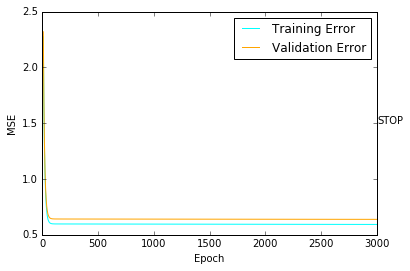

Training with learning rate = 0.0010, momentum = 0.9000
	Adjusted R-squared in training set   = 0.0525
	Error in training set  : MSE = 0.5671, RMSE = 0.7531
	Error in validation set: MSE = 0.6210, RMSE = 0.7881


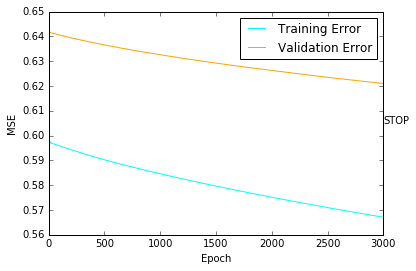

Training with learning rate = 0.0050, momentum = 0.0000
	Adjusted R-squared in training set   = 0.0316
	Error in training set  : MSE = 0.5796, RMSE = 0.7613
	Error in validation set: MSE = 0.6292, RMSE = 0.7932


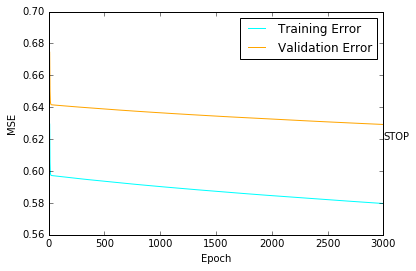

Training with learning rate = 0.0050, momentum = 0.9000
Early stopping at epoch 2626: 
	Adjusted R-squared in training set   = 0.0942
	Error in training set  : MSE = 0.5422, RMSE = 0.7363
	Error in validation set: MSE = 0.6043, RMSE = 0.7774


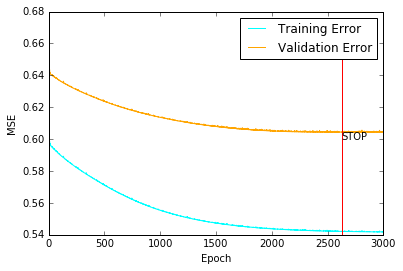

Training with learning rate = 0.0100, momentum = 0.0000
	Adjusted R-squared in training set   = 0.0526
	Error in training set  : MSE = 0.5671, RMSE = 0.7530
	Error in validation set: MSE = 0.6210, RMSE = 0.7880


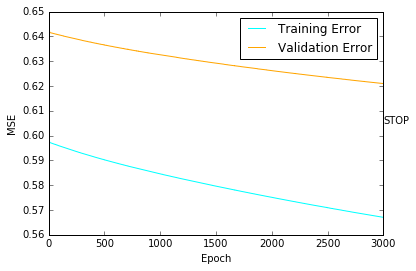

Training with learning rate = 0.0100, momentum = 0.9000
Early stopping at epoch 1256: 
	Adjusted R-squared in training set   = 0.0938
	Error in training set  : MSE = 0.5424, RMSE = 0.7365
	Error in validation set: MSE = 0.6044, RMSE = 0.7774


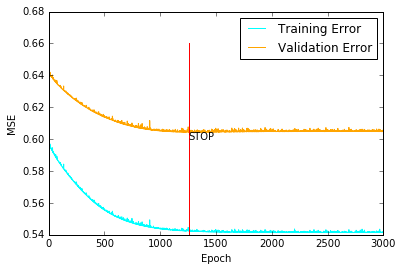

In [5]:
print "Activation function: SIGMOID"
exp_activation_function(parm.SIGMOID)

### 6.1.2 Find the best parameters of Rectified Linear

Activation function: RELU
Training with learning rate = 0.0010, momentum = 0.0000
	Adjusted R-squared in training set   = -0.9276
	Error in training set  : MSE = 1.1538, RMSE = 1.0741
	Error in validation set: MSE = 1.3322, RMSE = 1.1542


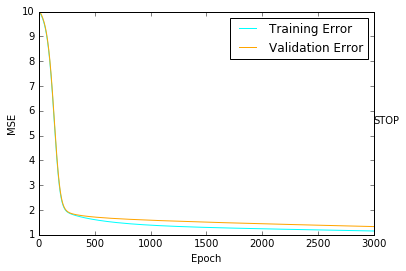

Training with learning rate = 0.0010, momentum = 0.9000
Early stopping at epoch 2223: 
	Adjusted R-squared in training set   = 0.0957
	Error in training set  : MSE = 0.5413, RMSE = 0.7357
	Error in validation set: MSE = 0.6063, RMSE = 0.7786


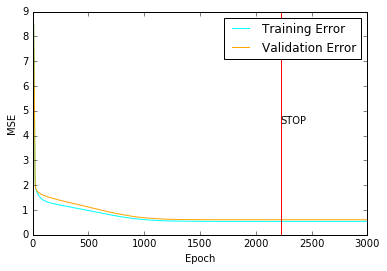

Training with learning rate = 0.0050, momentum = 0.0000
Early stopping at epoch 2998: 
	Adjusted R-squared in training set   = 0.0918
	Error in training set  : MSE = 0.5436, RMSE = 0.7373
	Error in validation set: MSE = 0.6093, RMSE = 0.7806


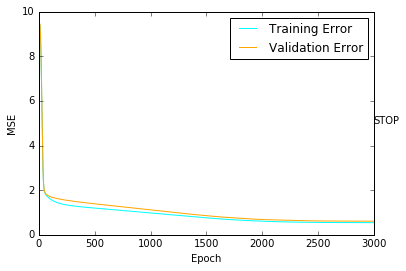

Training with learning rate = 0.0050, momentum = 0.9000
Early stopping at epoch 1869: 
	Adjusted R-squared in training set   = 0.0946
	Error in training set  : MSE = 0.5419, RMSE = 0.7362
	Error in validation set: MSE = 0.6037, RMSE = 0.7770


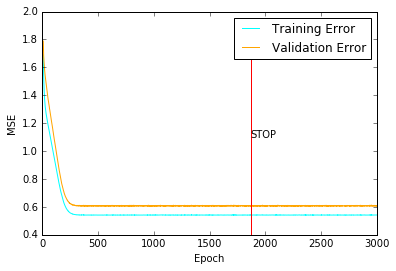

Training with learning rate = 0.0100, momentum = 0.0000
Early stopping at epoch 1933: 
	Adjusted R-squared in training set   = 0.0956
	Error in training set  : MSE = 0.5414, RMSE = 0.7358
	Error in validation set: MSE = 0.6062, RMSE = 0.7786


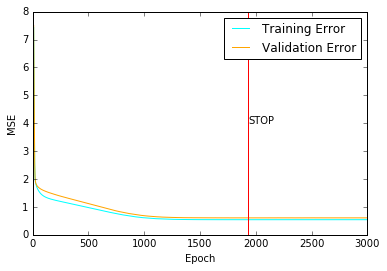

Training with learning rate = 0.0100, momentum = 0.9000
Early stopping at epoch 1177: 
	Adjusted R-squared in training set   = 0.0905
	Error in training set  : MSE = 0.5444, RMSE = 0.7378
	Error in validation set: MSE = 0.6015, RMSE = 0.7756


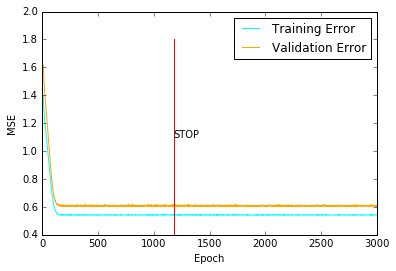

In [6]:
print "Activation function: RELU"
exp_activation_function(parm.RELU)

Fixed parameters

In [8]:
def default_model():
    parm.mnb_size = 150
    parm.layers = [15]
    
    parm.n_epoch = 10000
    parm.max_patience = 6000
    
    parm.learning_rate = 0.005
    parm.momentum = 0.9
    
    parm.lamda = 0.00
    parm.run_dropout = False
    parm.run_batchnorm = False
    
default_model()

Best of SIGMOID
Training with learning rate = 0.0050, momentum = 0.9000
Early stopping at epoch 2626: 
	Adjusted R-squared in training set   = 0.0942
	Error in training set  : MSE = 0.5422, RMSE = 0.7363
	Error in validation set: MSE = 0.6043, RMSE = 0.7774


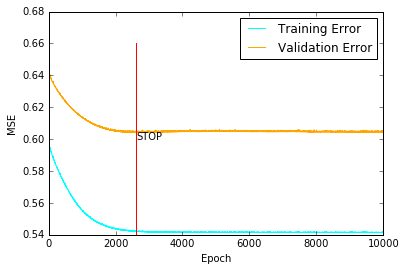

In [9]:
print 'Best of SIGMOID'
parm.act_func = parm.SIGMOID
SIG_Train_Errs, SIG_Val_Errs, SIG_Model = run_training(True)

write_result('Result/SIG_Train_Errs.csv', SIG_Train_Errs)
write_result('Result/SIG_Val_Errs.csv', SIG_Val_Errs)

Best of RELU
Training with learning rate = 0.0050, momentum = 0.9000
Early stopping at epoch 3563: 
	Adjusted R-squared in training set   = 0.0953
	Error in training set  : MSE = 0.5415, RMSE = 0.7359
	Error in validation set: MSE = 0.6036, RMSE = 0.7769


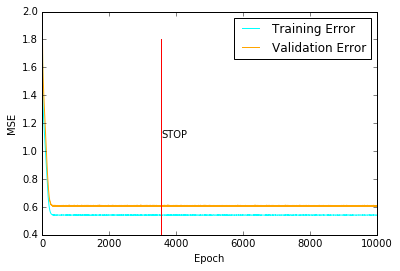

In [11]:
print 'Best of RELU'
parm.act_func = parm.RELU
RELU_Train_Errs, RELU_Val_Errs, RELU_Model = run_training(True)

write_result('Result/RELU_Train_Errs.csv', RELU_Train_Errs)
write_result('Result/RELU_Val_Errs.csv', RELU_Val_Errs)

### 6.2.2 Regularization

### Weight Decay

SIGMOID with Weight Decay
Training with learning rate = 0.0050, momentum = 0.9000
Early stopping at epoch 2626: 
	Adjusted R-squared in training set   = 0.0941
	Error in training set  : MSE = 0.5422, RMSE = 0.7364
	Error in validation set: MSE = 0.6043, RMSE = 0.7774


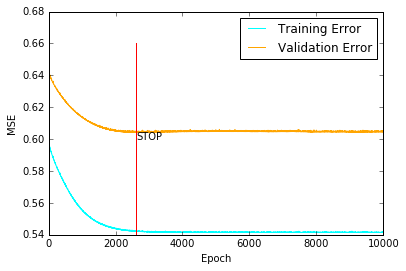

In [12]:
print 'SIGMOID with Weight Decay'
default_model()
parm.act_func = parm.SIGMOID 
parm.lamda = 0.00001

SIG_WD_Train_Errs, SIG_WD_Val_Errs, SIG_WD_Model = run_training(True)

write_result('Result/SIG_WD_Train.csv', SIG_WD_Train_Errs)
write_result('Result/SIG_WD_Val.csv', SIG_WD_Val_Errs)

SIGMOID with Weight Decay
Training with learning rate = 0.0050, momentum = 0.9000
Early stopping at epoch 2986: 
	Adjusted R-squared in training set   = 0.0938
	Error in training set  : MSE = 0.5424, RMSE = 0.7365
	Error in validation set: MSE = 0.6045, RMSE = 0.7775


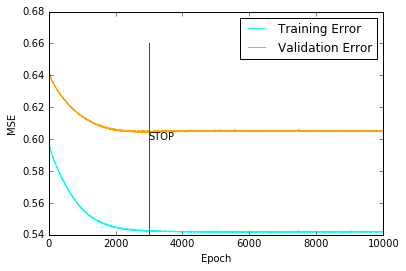

In [13]:
print 'SIGMOID with Weight Decay'
default_model()
parm.act_func = parm.SIGMOID
parm.lamda = 0.0001

SIG_WD_Train_Errs_2, SIG_WD_Val_Errs_2, SIG_WD_Model_2 = run_training(True)
write_result('Result/SIG_WD_Train_2.csv', SIG_WD_Train_Errs_2)
write_result('Result/SIG_WD_Val_2.csv', SIG_WD_Val_Errs_2)

RELU with Weight Decay
Training with learning rate = 0.0050, momentum = 0.9000
Early stopping at epoch 9474: 
	Adjusted R-squared in training set   = 0.0930
	Error in training set  : MSE = 0.5429, RMSE = 0.7368
	Error in validation set: MSE = 0.6035, RMSE = 0.7769


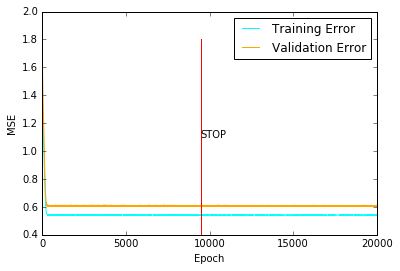

In [14]:
print 'RELU with Weight Decay'
default_model()
parm.n_epoch = 20000
parm.act_func = parm.RELU
parm.lamda = 0.00001

RELU_WD_Train_Errs, RELU_WD_Val_Errs, RELU_WD_Model = run_training(True)
write_result('Result/RELU_WD_Train.csv', RELU_WD_Train_Errs)
write_result('Result/RELU_WD_Val.csv', RELU_WD_Val_Errs)

RELU with Weight Decay
Training with learning rate = 0.0050, momentum = 0.9000
Early stopping at epoch 9474: 
	Adjusted R-squared in training set   = 0.0926
	Error in training set  : MSE = 0.5431, RMSE = 0.7370
	Error in validation set: MSE = 0.6035, RMSE = 0.7768


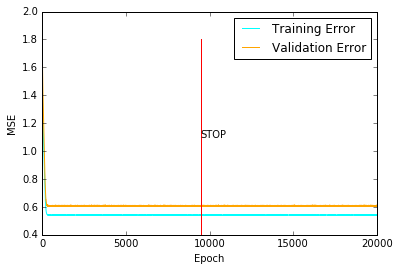

In [15]:
print 'RELU with Weight Decay'
default_model()
parm.n_epoch = 20000
parm.act_func = parm.RELU
parm.lamda = 0.0001

RELU_WD_Train_Errs_2, RELU_WD_Val_Errs_2, RELU_WD_Model_2 = run_training(True)

write_result('Result/RELU_WD_Train_2.csv', RELU_WD_Train_Errs_2)
write_result('Result/RELU_WD_Val_2.csv', RELU_WD_Val_Errs_2)

### Dropout

SIGMOID with Dropout
Training with learning rate = 0.0050, momentum = 0.9000
Early stopping at epoch 2: 
	Adjusted R-squared in training set   = 0.0066
	Error in training set  : MSE = 0.5946, RMSE = 0.7711
	Error in validation set: MSE = 0.6410, RMSE = 0.8006


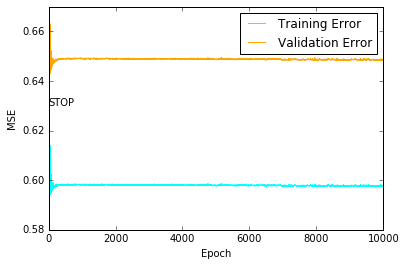

In [16]:
print 'SIGMOID with Dropout'
default_model()
parm.act_func = parm.SIGMOID 
parm.run_dropout = True

SIG_DR_Train_Errs, SIG_DR_Val_Errs, SIG_DR_Model = run_training(True)

write_result('Result/SIG_DR_Train.csv', SIG_DR_Train_Errs)
write_result('Result/SIG_DR_Val.csv', SIG_DR_Val_Errs)

RELU with Dropout
Training with learning rate = 0.0050, momentum = 0.9000
Early stopping at epoch 3109: 
	Adjusted R-squared in training set   = 0.0944
	Error in training set  : MSE = 0.5420, RMSE = 0.7362
	Error in validation set: MSE = 0.6062, RMSE = 0.7786


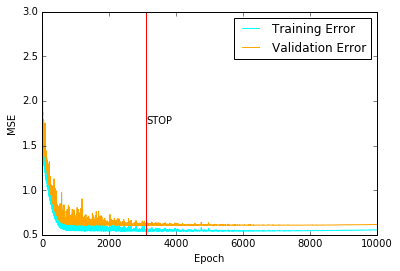

In [17]:
print 'RELU with Dropout'
default_model()
parm.act_func = parm.RELU
parm.run_dropout = True

RELU_DR_Train_Errs, RELU_DR_Val_Errs, RELU_DR_Model = run_training(True)

write_result('Result/RELU_DR_Train.csv', RELU_DR_Train_Errs)
write_result('Result/RELU_DR_Val.csv', RELU_DR_Val_Errs)

### 6.2.3. Batch normalization

In [18]:
def batchnorm_model():
    parm.learning_rate = 0.01
    parm.n_epoch = 5000
    parm.max_patience = 3000
    parm.run_dropout = False
    parm.lamda = 0.0

In [19]:
def batchnorm_model2():
    parm.learning_rate = 0.05
    parm.n_epoch = 2000
    parm.max_patience = 1500
    parm.run_dropout = False
    parm.lamda = 0.0

SIGMOID with Batch Normalization
Training with learning rate = 0.0100, momentum = 0.9000
Early stopping at epoch 1051: 
	Adjusted R-squared in training set   = 0.0960
	Error in training set  : MSE = 0.5411, RMSE = 0.7356
	Error in validation set: MSE = 0.6005, RMSE = 0.7749


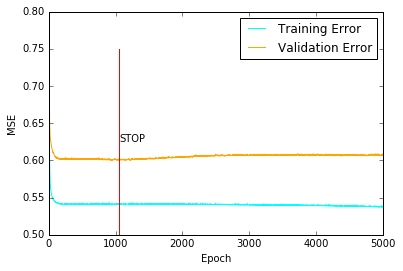

In [20]:
print 'SIGMOID with Batch Normalization'
batchnorm_model()
parm.act_func = parm.SIGMOID # SIGMOID, RELU
parm.run_batchnorm = True

SIG_BN_Train_Errs, SIG_BN_Val_Errs, SIG_BN_Model = run_training(True)

write_result('Result/SIG_BN_Train.csv', SIG_BN_Train_Errs)
write_result('Result/SIG_BN_Val.csv', SIG_BN_Val_Errs)

SIGMOID with Batch Normalization
Training with learning rate = 0.0500, momentum = 0.9000
Early stopping at epoch 198: 
	Adjusted R-squared in training set   = 0.0972
	Error in training set  : MSE = 0.5404, RMSE = 0.7351
	Error in validation set: MSE = 0.5989, RMSE = 0.7739


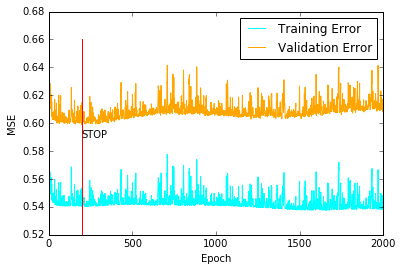

In [22]:
print 'SIGMOID with Batch Normalization'
batchnorm_model2()
parm.act_func = parm.SIGMOID # SIGMOID, RELU
parm.run_batchnorm = True

SIG_BN_Train_Errs2, SIG_BN_Val_Errs2, SIG_BN_Model2 = run_training(True)

write_result('Result/SIG_BN_Train_2.csv', SIG_BN_Train_Errs2)
write_result('Result/SIG_BN_Val_2.csv', SIG_BN_Val_Errs2)

RELU with Batch Normalization
Training with learning rate = 0.0100, momentum = 0.9000
Early stopping at epoch 1283: 
	Adjusted R-squared in training set   = 0.0103
	Error in training set  : MSE = 0.5924, RMSE = 0.7697
	Error in validation set: MSE = 0.6361, RMSE = 0.7976


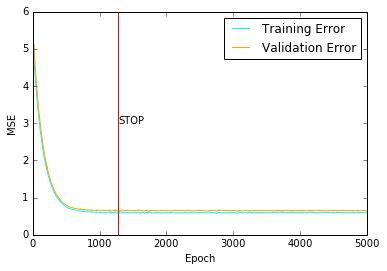

In [23]:
print 'RELU with Batch Normalization'
batchnorm_model()
parm.learning_rate = 0.01
parm.act_func = parm.RELU # SIGMOID, RELU
parm.run_batchnorm = True

RELU_BN_Train_Errs, RELU_BN_Val_Errs, RELU_BN_Model = run_training(True)

write_result('Result/RELU_BN_Train.csv', RELU_BN_Train_Errs)
write_result('Result/RELU_BN_Val.csv', RELU_BN_Val_Errs)

RELU with Batch Normalization
Training with learning rate = 0.1000, momentum = 0.9000
Early stopping at epoch 3400: 
	Adjusted R-squared in training set   = 0.0948
	Error in training set  : MSE = 0.5418, RMSE = 0.7361
	Error in validation set: MSE = 0.5994, RMSE = 0.7742


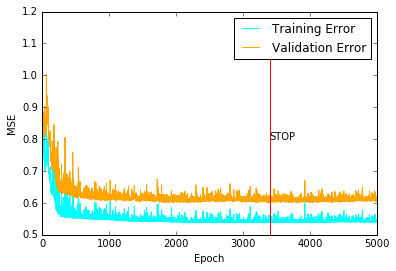

In [24]:
print 'RELU with Batch Normalization'
batchnorm_model()
parm.learning_rate = 0.1
parm.act_func = parm.RELU # SIGMOID, RELU
parm.run_batchnorm = True

RELU_BN_Train_Errs_2, RELU_BN_Val_Errs_2, RELU_BN_Model_2 = run_training(True)

write_result('Result/RELU_BN_Train_Errs_2.csv', RELU_BN_Train_Errs_2)
write_result('Result/RELU_BN_Val_Errs_2.csv', RELU_BN_Val_Errs_2)

## Test

Mô hình tốt nhất là SIGMOID + BN, learning rate = 0.05, momentum = 0.9. Kết quả trên tập test:

In [26]:
error = run_testing(SIG_BN_Model2)
print 'RMSE = %.4f' % (np.sqrt(error))

Test:
 Adjusted R-squared: 0.0816
 Error in testing set: MSE = 0.5502
RMSE = 0.7417
